In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image

array([[[  1,   1,   1],
        [  3,   3,   3],
        [  0,   0,   0],
        ...,
        [  2,   1,   3],
        [  0,   0,   1],
        [  0,   0,   1]],

       [[  4,   0,   0],
        [  5,   3,   2],
        [  1,   2,   0],
        ...,
        [  4,   0,   0],
        [ 18,  14,  13],
        [  4,   0,   0]],

       [[ 76,  70,  65],
        [ 85,  79,  74],
        [ 80,  76,  71],
        ...,
        [132, 129, 121],
        [132, 129, 121],
        [147, 144, 136]],

       ...,

       [[ 46,  56,  40],
        [  5,  10,   0],
        [ 88,  87,  73],
        ...,
        [ 83,  92,  72],
        [ 84,  93,  73],
        [ 79,  86,  71]],

       [[ 12,  19,   0],
        [ 88,  90,  71],
        [255, 255, 242],
        ...,
        [ 73,  84,  64],
        [ 40,  50,  33],
        [ 34,  44,  28]],

       [[166, 173, 146],
        [174, 176, 154],
        [193, 189, 170],
        ...,
        [127, 138, 118],
        [ 66,  76,  59],
        [ 60,  70,  54]]], dtype=uint8)
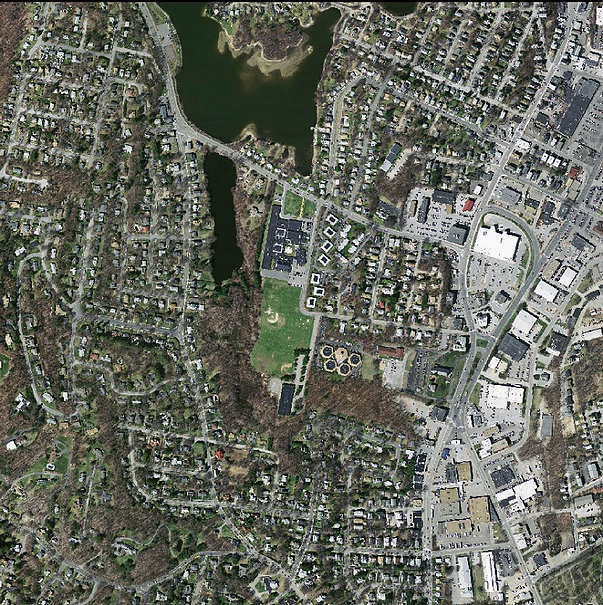

In [495]:
img = cv2.imread("Input.jpg")
img

array([[[  0,   0,   1],
        [  0,   0,   3],
        [  0,   0,   0],
        ...,
        [165, 170,   3],
        [  0, 255,   1],
        [  0, 255,   1]],

       [[120, 255,   4],
        [110, 153,   5],
        [ 75, 255,   2],
        ...,
        [120, 255,   4],
        [114,  71,  18],
        [120, 255,   4]],

       [[106,  37,  76],
        [106,  33,  85],
        [103,  29,  80],
        ...,
        [ 98,  21, 132],
        [ 98,  21, 132],
        [ 98,  19, 147]],

       ...,

       [[ 71,  73,  56],
        [ 75, 255,  10],
        [ 92,  43,  88],
        ...,
        [ 77,  55,  92],
        [ 77,  55,  93],
        [ 76,  44,  86]],

       [[ 79, 255,  19],
        [ 87,  54,  90],
        [ 90,  13, 255],
        ...,
        [ 74,  61,  84],
        [ 72,  87,  50],
        [ 71,  93,  44]],

       [[ 82,  40, 173],
        [ 87,  32, 176],
        [ 95,  30, 193],
        ...,
        [ 74,  37, 138],
        [ 72,  57,  76],
        [ 71,  58,  70]]], dtype=uint8)
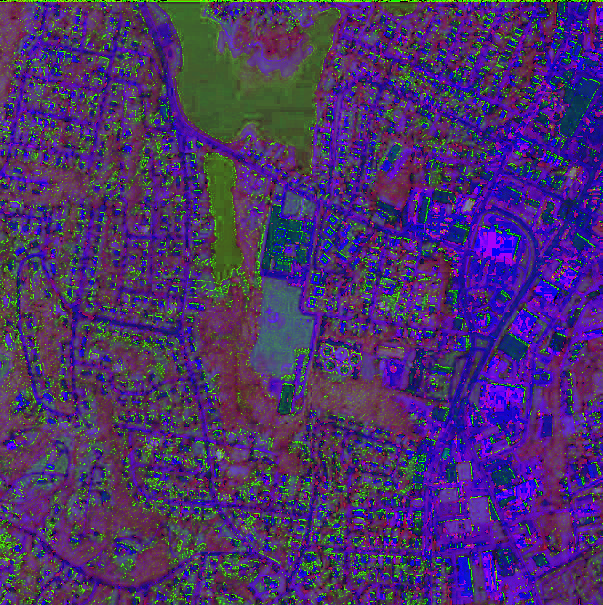

In [496]:
hsi = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsi

array([[[ 70, 109,  17],
        [ 68, 114,  17],
        [ 60, 140,  15],
        ...,
        [109, 175,  22],
        [ 91, 173,  24],
        [ 86, 173,  23]],

       [[ 77, 105,  26],
        [ 75, 111,  25],
        [ 69, 130,  23],
        ...,
        [108, 149,  38],
        [ 96, 142,  44],
        [ 92, 140,  46]],

       [[ 99,  81,  58],
        [ 98,  84,  57],
        [ 94,  91,  54],
        ...,
        [106,  80,  79],
        [102,  75,  91],
        [100,  74,  94]],

       ...,

       [[ 75, 110,  65],
        [ 76, 105,  69],
        [ 86,  71, 118],
        ...,
        [ 75,  60,  87],
        [ 75,  62,  81],
        [ 75,  62,  79]],

       [[ 82, 102,  99],
        [ 84,  90, 113],
        [ 90,  52, 157],
        ...,
        [ 75,  60,  85],
        [ 74,  64,  77],
        [ 74,  66,  74]],

       [[ 84,  94, 112],
        [ 85,  84, 124],
        [ 90,  49, 162],
        ...,
        [ 75,  60,  84],
        [ 73,  65,  75],
        [ 73,  68,  72]]], dtype=uint8)
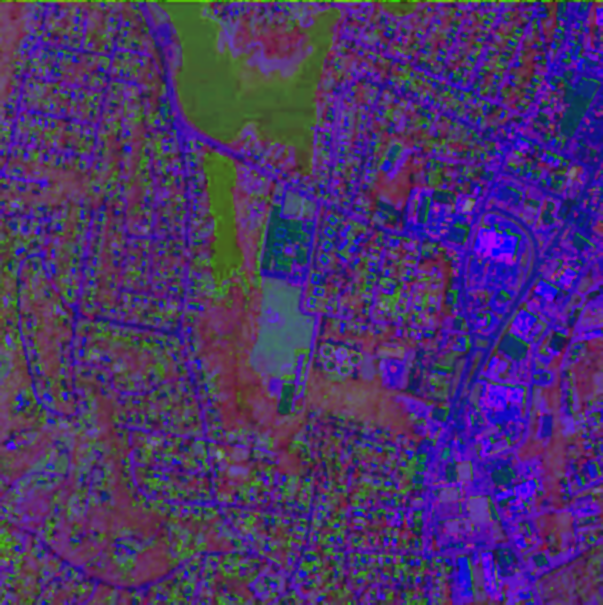

In [499]:
blur = cv2.GaussianBlur(hsi,(5,5),0)
blur = cv2.bilateralFilter(blur,3,30,30)
blur

array([[109, 114, 140, ..., 175, 173, 173],
       [105, 111, 130, ..., 149, 142, 140],
       [ 81,  84,  91, ...,  80,  75,  74],
       ...,
       [110, 105,  71, ...,  60,  62,  62],
       [102,  90,  52, ...,  60,  64,  66],
       [ 94,  84,  49, ...,  60,  65,  68]], dtype=uint8)
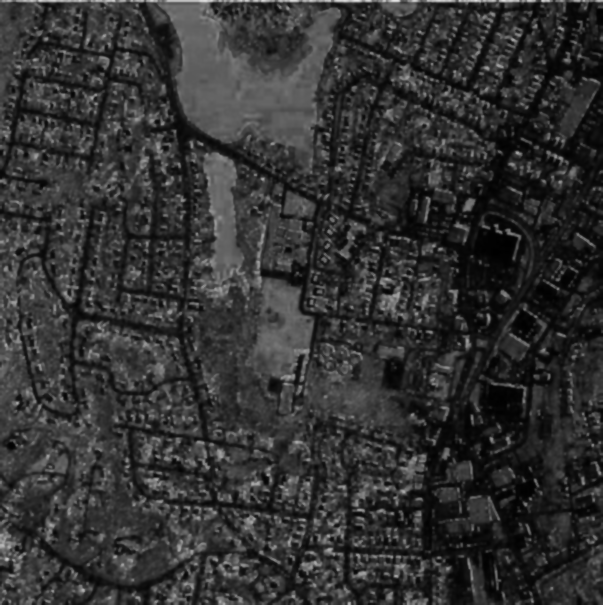

In [500]:
hm = blur[:,:,1]
hm

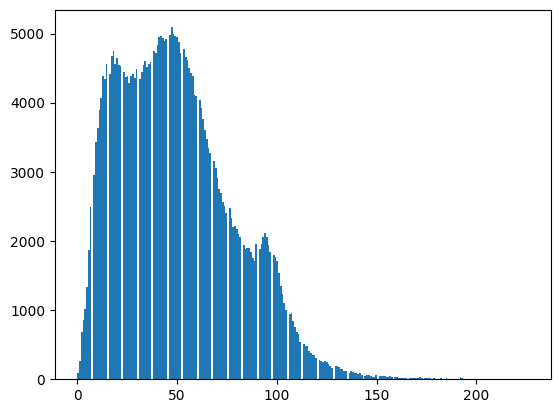

In [501]:
hist = plt.hist(hm.flatten(),bins=256)
# plt.vlines(0,0,5000)
# plt.vlines(20,0,5000)

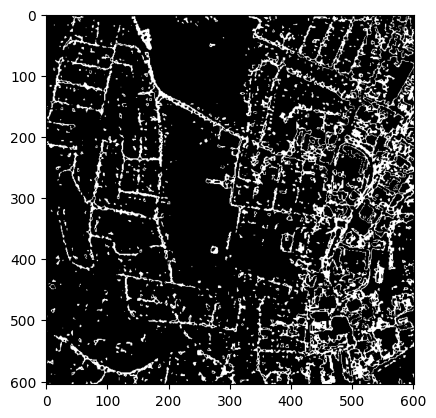

In [506]:
dummy = np.zeros_like(hm)
dummy[np.where((hm>12) & (hm<25))] = 1
plt.imshow(dummy,cmap='gray')

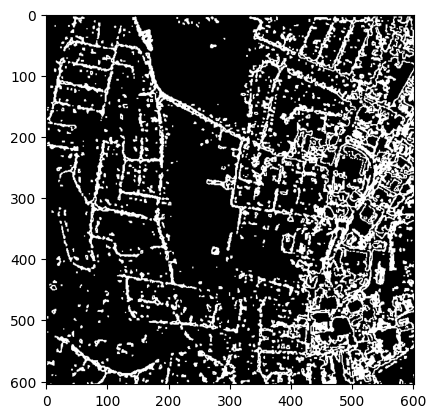

In [507]:
rect = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))

eroded = cv2.erode(dummy,rect,iterations = 1)
closing = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, rect)
closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, rect)
dilated = cv2.dilate(dummy,rect,iterations = 1)
bin_img = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, rect)

plt.imshow(bin_img,cmap='gray')

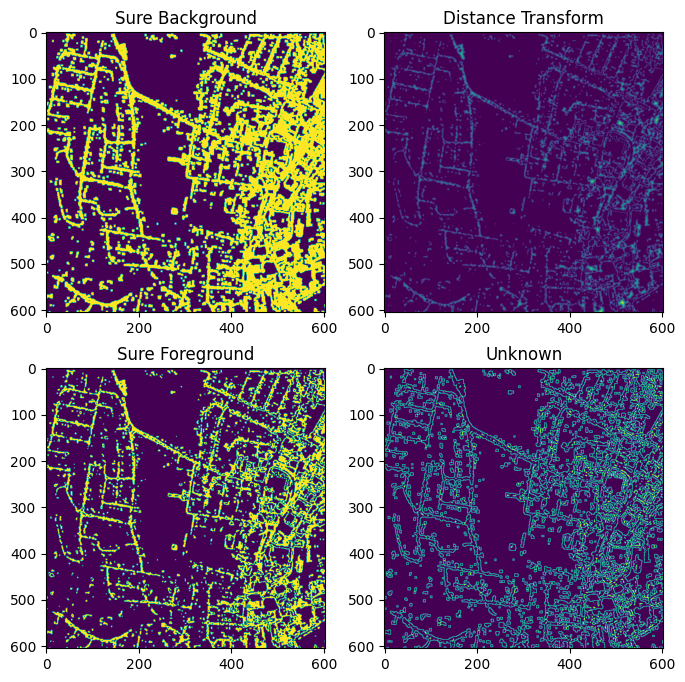

In [509]:

gig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# sure background area
sure_bg = cv2.dilate(dummy, kernel, iterations=3)
axes[0,0].imshow(sure_bg)
axes[0, 0].set_title('Sure Background')

# Distance transform
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 3)
axes[0,1].imshow(dist)
axes[0, 1].set_title('Distance Transform')

#foreground area
ret, sure_fg = cv2.threshold(dist, 0.02 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
axes[1,0].imshow(sure_fg)
axes[1, 0].set_title('Sure Foreground')

# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)
axes[1,1].imshow(unknown)
axes[1, 1].set_title('Unknown')

plt.show()

In [510]:
ret, markers = cv2.connectedComponents(sure_fg)

markers += 1
markers[unknown == 255] = 0

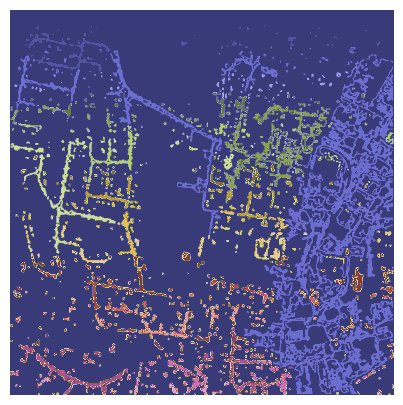

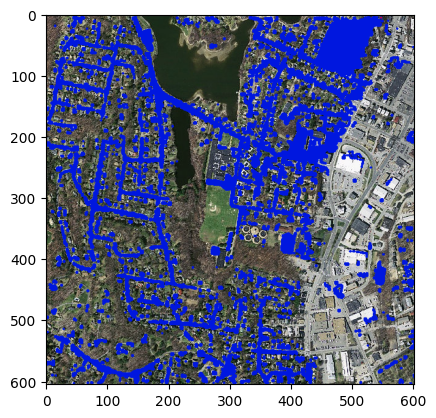

In [531]:
markers = cv2.watershed(img, markers)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()


labels = np.unique(markers)

coins = []
for label in labels[2:]:

# Create a binary image in which only the area of the label is in the foreground
#and the rest of the image is in the background
    target = np.where(markers == label, 255, 0).astype(np.uint8)

  # Perform contour extraction on the created binary image
    contours, hierarchy = cv2.findContours(
        target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    coins.append(contours[0])

# Draw the outline
img = cv2.drawContours(img, coins, 10, color=(255, 0, 0), thickness=cv2.FILLED)
plt.imshow(img)

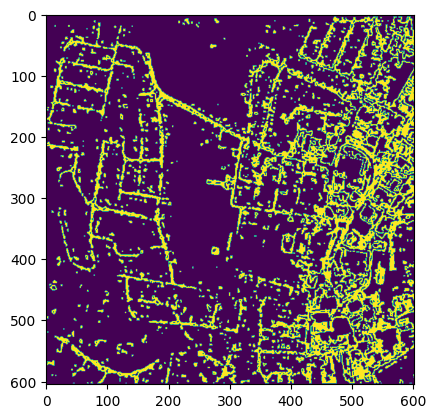

In [515]:
plt.imshow(markers>1)